In [12]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
E1 = pd.read_csv('E1.csv', header=None)
E1['C'] = E1[0].str.extract(r'GA(\d+)_\d+')[0] # Crossover method
E1['M'] = E1[0].str.extract(r'GA\d+_(\d+)')[0] # Mutation method
E1

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,C,M
0,GA1_1,24,21,19,16,12,12,11,11,11,...,3,3,3,3,3,3,3,3,1,1
1,GA1_2,38,38,35,30,24,22,20,19,18,...,17,17,17,17,17,17,17,17,1,2
2,GA1_3,31,31,30,22,22,17,16,14,13,...,6,6,6,6,6,6,6,6,1,3
3,GA1_4,31,26,24,23,17,15,13,12,11,...,9,9,9,9,9,9,9,9,1,4
4,GA2_1,30,28,28,25,24,21,20,20,19,...,0,0,0,0,0,0,0,0,2,1
5,GA2_2,23,23,20,19,19,16,15,14,13,...,0,0,0,0,0,0,0,0,2,2
6,GA2_3,25,23,23,22,19,18,18,17,12,...,0,0,0,0,0,0,0,0,2,3
7,GA2_4,27,25,22,21,20,18,18,15,15,...,0,0,0,0,0,0,0,0,2,4
8,GA3_1,23,15,15,11,6,6,4,4,4,...,0,0,0,0,0,0,0,0,3,1
9,GA3_2,27,14,12,12,12,2,1,1,0,...,0,0,0,0,0,0,0,0,3,2


In [14]:
# for each method generate the corresponding df
C = []
M = []
for i in range (1,5):
    C.append(E1[E1['C']==f'{i}'].iloc[:, 1:103])
    M.append(E1[E1['M']==f'{i}'].iloc[:, 1:103])

In [15]:
# Mapping the method name
C_index={'1':'Baseline', '2':'Order Based', '3':'Priority Based', '4': "Edge Based"}
M_index={'1':'Baseline(Swap gene)', '2':'Split & Swap', '3':'Shuffle', '4': "Inverse"}
for i in range(4): 
    C[i] = C[i].copy()  
    C[i]['C_name'] = C_index[C[i]['C'].iloc[0]]  
    C[i]['M_name'] = C[i]['M'].apply(lambda x: M_index[str(x)])
    C[i] = C[i].reset_index(drop=True)

    M[i] = M[i].copy()  
    M[i]['C_name'] = M[i]['C'].apply(lambda x: C_index[str(x)])
    M[i]['M_name'] = M_index[M[i]['M'].iloc[0]] 

    M[i] = M[i].reset_index(drop=True)

In [16]:
C[1]

,1,2,3,4,5,6,7,8,9,10,...,95,96,97,98,99,100,C,M,C_name,M_name
0,30,28,28,25,24,21,20,20,19,17,...,0,0,0,0,0,0,2,1,Order Based,Baseline(Swap gene)
1,23,23,20,19,19,16,15,14,13,12,...,0,0,0,0,0,0,2,2,Order Based,Split & Swap
2,25,23,23,22,19,18,18,17,12,12,...,0,0,0,0,0,0,2,3,Order Based,Shuffle
3,27,25,22,21,20,18,18,15,15,13,...,0,0,0,0,0,0,2,4,Order Based,Inverse


In [6]:
C_index={'1':'Base ', '2':'Order', '3':'Prior  ', '4': "Edge "}
M_index={'1':'Swap ', '2':'Split', '3':'Shuf ', '4': "Inv  "}

In [7]:
for i in range(4): 
    C[i] = C[i].copy()  
    C[i]['C_name'] = C_index[C[i]['C'].iloc[0]]  
    C[i]['M_name'] = C[i]['M'].apply(lambda x: M_index[str(x)])
    C[i] = C[i].reset_index(drop=True)

    M[i] = M[i].copy()  
    M[i]['C_name'] = M[i]['C'].apply(lambda x: C_index[str(x)])
    M[i]['M_name'] = M_index[M[i]['M'].iloc[0]] 

    M[i] = M[i].reset_index(drop=True)

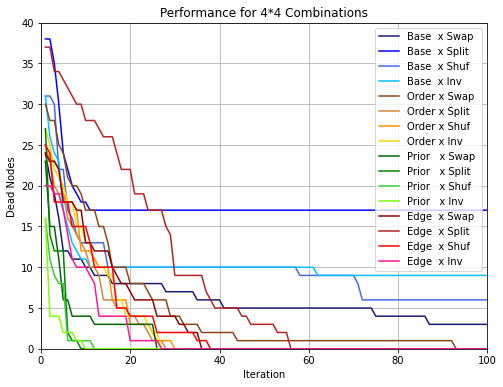

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming C[0] to C[3] are your dataframes
C_combined = pd.concat([C[0], C[1], C[2], C[3]], ignore_index=True)

def plot(df):
    # Extract the data, C_name, and M_name columns
    data = df.iloc[:, :100]
    C_name = df['C_name']
    M_name = df['M_name']

    # Define color schemes for groups of 4
    color_groups = {
        0: ['midnightblue', 'blue', 'royalblue','deepskyblue'],
        1: ['saddlebrown', 'peru', 'darkorange', 'gold'],
        2: ['darkgreen', 'green', 'limegreen', 'chartreuse'],
        3: ['darkred', 'firebrick', 'red', 'deeppink']
    }

    # Set up the plot
    plt.figure(figsize=(8, 6))
    for i, row in data.iterrows():
        group = i // 4  # Determine the group (based on every 4 rows)
        color_index = i % 4  # Determine the color within the group
        color = color_groups[group][color_index]

        lgd = f"{C_name.iloc[i]} x {M_name.iloc[i]}"

        # Plot each row
        plt.plot(range(1, 101), row.values, label=lgd, color=color)

    # Add plot details
    plt.title("Performance for 4*4 Combinations")
    plt.xlabel('Iteration')
    plt.ylabel('Dead Nodes')
    plt.xlim(0, 100)
    plt.ylim(0, 40)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Call the plot function with the combined dataframe
plot(C_combined)


In [9]:
# Import pandas
import pandas as pd

# Assuming C_combined is a pandas DataFrame
def find_first_zero(df):
    # Get only the numeric columns (the first 100 columns in this case)
    numeric_data = df.iloc[:, :100]
    
    # Iterate over rows to find the first zero in each row
    for index, row in numeric_data.iterrows():
        # Find the index of the first occurrence of 0
        first_zero_idx = (row == 0).idxmax() if 0 in row.values else None
        # Print the result
        if first_zero_idx is not None:
            print(f"Row {index}: First 0 occurs at column {first_zero_idx}")
        else:
            print(f"Row {index}: No zero found")

# Call the function with the dataframe
find_first_zero(C_combined)


Row 0: No zero found
Row 1: No zero found
Row 2: No zero found
Row 3: No zero found
Row 4: First 0 occurs at column 93
Row 5: First 0 occurs at column 28
Row 6: First 0 occurs at column 30
Row 7: First 0 occurs at column 27
Row 8: First 0 occurs at column 26
Row 9: First 0 occurs at column 9
Row 10: First 0 occurs at column 12
Row 11: First 0 occurs at column 10
Row 12: First 0 occurs at column 36
Row 13: First 0 occurs at column 56
Row 14: First 0 occurs at column 38
Row 15: First 0 occurs at column 27


In [17]:
def plot(df):   
    data = df.iloc[:, :100]
    C_name = df['C_name'] 
    M_name = df['M_name'] 

    # Plot each row
    plt.figure(figsize=(12, 6)) 
    for i, row in data.iterrows():
        if i==0:
            lgd = f"Crossover: {C_name.iloc[i]:<11}"+"      "+f" Mutation: {M_name.iloc[i]:<20}"
        elif i==2:
            lgd = f"Crossover: {C_name.iloc[i]:<11}"+f"  Mutation: {M_name.iloc[i]:<20}"
        else: 
            lgd = f"Crossover: {C_name.iloc[i]:<11}"+"   "+f" Mutation: {M_name.iloc[i]:<20}"
        plt.plot(range(1, 101), row.values, label = lgd)
    plt.title(f"Best Performance for Each Crossover Method")
    plt.xlabel('Iteration')
    plt.ylabel('Dead Nodes')
    plt.xlim(0, 100) 
    plt.ylim(0, 30)
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.show()


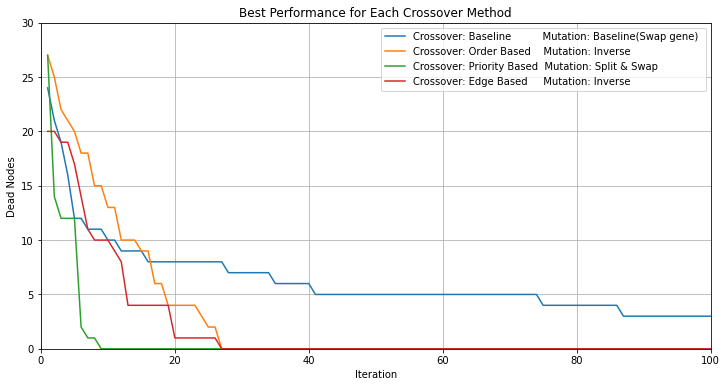

In [18]:
Opt = pd.DataFrame()
best_M = ['1','4','2','4']
for i in range(4):
     Opt = pd.concat([Opt, C[i][C[i]['M'] == f'{best_M[i]}']])
Opt = Opt.reset_index(drop=True)
plot(Opt)

In [32]:
def plot(df, i,iter_):
    x = np.arange(df[0].shape[0]) 
    plt.figure(figsize=(12, 6)) 
    
    for j in range(4):
        plt.plot(x, df[j], label=f'crossover{j+1}_high')

    # Add labels and title
    plt.title(f"Performance for Scene: {scene[i]}")
    plt.xlabel('Iterations')
    plt.ylabel('Dead Nodes')
    plt.xlim(0, iter_)
    plt.legend(loc='upper right')
    plt.grid(True)
    
    plt.show()

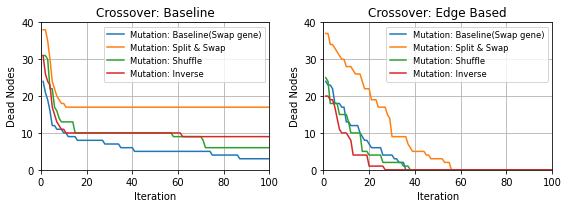

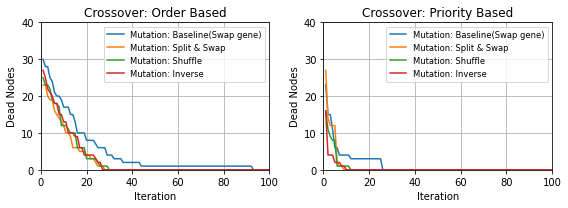

In [29]:
import matplotlib.pyplot as plt

def plotC(ax, df):
    data = df.iloc[:, :100]
    C_name = df['C_name'].iloc[0]  
    M_name = df['M_name'] 

    # Plot each row on the provided axes
    for i, row in data.iterrows():
        ax.plot(range(1, 101), row.values, label=f"Mutation: {M_name.iloc[i]}")

    ax.set_title(f"Crossover: {C_name}")
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Dead Nodes')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 40)
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(True)

# Create the first figure with two horizontal subplots
fig1, axes1 = plt.subplots(1, 2, figsize=(8, 3))  # Two subplots horizontally
axes1 = axes1.ravel()
plotC(axes1[0], C[0])  # Left plot
plotC(axes1[1], C[3])  # Right plot
plt.tight_layout()
plt.savefig("crossover_plot_top_horizontal.png")  # Save first figure

# Create the second figure with two horizontal subplots
fig2, axes2 = plt.subplots(1, 2, figsize=(8, 3))  # Two subplots horizontally
axes2 = axes2.ravel()
plotC(axes2[0], C[1])  # Left plot
plotC(axes2[1], C[2])  # Right plot
plt.tight_layout()
plt.savefig("crossover_plot_bottom_horizontal.png")  # Save second figure



In [20]:
import matplotlib.pyplot as plt

def plotC(ax, df):
    data = df.iloc[:, :100]
    C_name = df['C_name'].iloc[0]  
    M_name = df['M_name'] 

    # Plot each row on the provided axes
    for i, row in data.iterrows():
        ax.plot(range(1, 101), row.values, label=f"Mutation: {M_name.iloc[i]}")

    ax.set_title(f"Crossover: {C_name}")
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Dead Nodes')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 40)
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(True)

# Create the first figure
fig1, axes1 = plt.subplots(2, 1, figsize=(8, 10))  # Two subplots vertically
axes1 = axes1.ravel()
plotC(axes1[0], C[0])  # Top plot
plotC(axes1[1], C[1])  # Bottom plot
plt.tight_layout()
plt.savefig("crossover_plot_top.png")  # Save first figure
plt.close(fig1)  # Close the figure to free memory

# Create the second figure
fig2, axes2 = plt.subplots(2, 1, figsize=(8, 10))  # Two subplots vertically
axes2 = axes2.ravel()
plotC(axes2[0], C[2])  # Top plot
plotC(axes2[1], C[3])  # Bottom plot
plt.tight_layout()
plt.savefig("crossover_plot_bottom.png")  # Save second figure
plt.close(fig2)